## Mount with your Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setup darknet environment

In [2]:
import os
assert os.getcwd()=='/content', 'Directory should be "/content" instead of "{}"'.format(os.getcwd())

# Download and compile darknet_for_colab
!git clone https://github.com/CZ3004-Group-13/darknet_for_colab.git
%cd darknet_for_colab
!make
!chmod +x ./darknet

Cloning into 'darknet_for_colab'...
remote: Enumerating objects: 1119, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 1119 (delta 17), reused 0 (delta 0), pack-reused 1083
Receiving objects: 100% (1119/1119), 5.18 MiB | 14.25 MiB/s, done.
Resolving deltas: 100% (250/250), done.
/content/darknet_for_colab
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-vari

## Copy yolov4 last trained weights

In [3]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())
!cp /content/drive/MyDrive/YOLOv4_weight/backup/yolov4_custom_train_last.weights /content/darknet_for_colab

## Download custom dataset (yolo format)

In [4]:
%cd data
assert os.getcwd()=='/content/darknet_for_colab/data', 'Directory should be "/content/darknet_for_colab/data" instead of "{}"'.format(os.getcwd())

# Download data set from google drive
!cp /content/drive/MyDrive/ts.zip /content/darknet_for_colab/data
!unzip ts.zip
!rm -f ts.zip
!ls
%cd ..

/content/darknet_for_colab/data
Archive:  ts.zip
  inflating: classes.names           
  inflating: test.txt                
  inflating: train.txt               
  inflating: ts/image0-00.jpg        
  inflating: ts/image0-00.txt        
  inflating: ts/image0-01.jpg        
  inflating: ts/image0-01.txt        
  inflating: ts/image0-02.jpg        
  inflating: ts/image0-02.txt        
  inflating: ts/image0-03.jpg        
  inflating: ts/image0-03.txt        
  inflating: ts/image0-04.jpg        
  inflating: ts/image0-04.txt        
  inflating: ts/image0-05.jpg        
  inflating: ts/image0-05.txt        
  inflating: ts/image0-06.jpg        
  inflating: ts/image0-06.txt        
  inflating: ts/image0-07.jpg        
  inflating: ts/image0-07.txt        
  inflating: ts/image0-08.jpg        
  inflating: ts/image0-08.txt        
  inflating: ts/image0-09.jpg        
  inflating: ts/image0-09.txt        
  inflating: ts/image0-10.jpg        
  inflating: ts/image0-10.txt        
 

## Visualize custom dataset examples (optional)

image13-13.txt: 
13 0.511962 0.402469 0.192584 0.400000

image6-02.txt: 
6 0.596292 0.552469 0.234450 0.425926

image10-04.txt: 
10 0.590311 0.370370 0.180622 0.311111

image15-06.txt: 
15 0.558014 0.377778 0.130383 0.232099



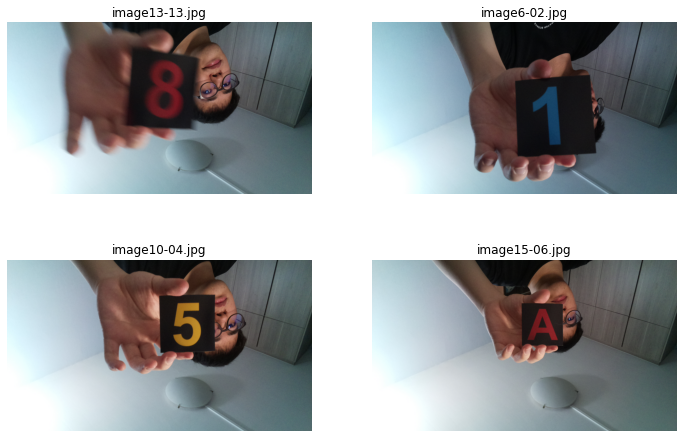

In [5]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob

def read_label(image_path):
  file_name = image_path.replace('.jpg', '.txt')
  with open(file_name, 'rt') as file:
    print(os.path.basename(file_name) + ': \n' + file.read())

image_path = glob.glob("data/ts/*.jpg")
fig = plt.figure(figsize=(12,8))
cols = 2
rows = 2
grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
for i in range(cols*rows):
  fig.add_subplot(grid[i])
  image=plt.imread(image_path[i])
  plt.title(os.path.basename(image_path[i]))
  plt.axis(False)
  plt.imshow(image)
  read_label(image_path[i])

plt.savefig("dataset_examples.jpg", dpi=300)

## Modify yolov4 architecture

**Double click on file `yolov4_config.py` to modify the hyperpameters directly from Colab environment**

E.g: I will train my dataset with these parameters:
 - classes= 31, 
 - max_batches=1000
 - batch=64
 - subdivisions=16
 - width=256
 - height=256
 - ...

In [6]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

# Run python script to create our customize yolov4_custom_train.cfg 
# and yolov4_custom_tes.cfg in folder /cfg
!python yolov4_setup.py

[INFO] Generating yolov4_custom_train.cfg successfully...
[INFO] Generating yolov4_custom_test.cfg successfully...


## Create symbolic link in our Drive

Make sure that you laready created directory _YOLOv4_weight/backup_ in your Drive

In [7]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

# Delete backup folder from our runtime
!rm /content/darknet_for_colab/backup -r

# Create Symlinks so we can save trained weight in our Google Drive
# Create folder YOLOv4_weight/backup in your Drive to store trained weights
!ln -s /content/drive/'My Drive'/YOLOv4_weight/backup /content/darknet_for_colab

## Training

In [8]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

!./darknet detector train data/yolov4.data cfg/yolov4_custom_train.cfg yolov4_custom_train_last.weights -dont_show -map
# If you get CUDA out of memory adjust subdivisions above,
# adjust max batches down for shorter training above

Streaming output truncated to the last 5000 lines.
 total_bbox = 343593, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.835723, GIOU: 0.833966), Class: 0.936718, Obj: 0.911049, No Obj: 0.001005, .5R: 1.000000, .75R: 0.666667, count: 15, class_loss = 0.723851, iou_loss = 32.052383, total_loss = 32.776234 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.912444, GIOU: 0.911686), Class: 0.995951, Obj: 0.996184, No Obj: 0.007817, .5R: 1.000000, .75R: 1.000000, count: 28, class_loss = 0.010836, iou_loss = 10.910663, total_loss = 10.921498 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.913368, GIOU: 0.911810), Class: 0.996759, Obj: 0.999412, No Obj: 0.006692, .5R: 1.000000, .75R: 1.000000, count: 9, class_loss = 0.000114, iou_loss = 0.911709, total_loss = 0.911823 
 total_bbox = 343645, rewritten_bbox = 0.000000 % 

 (next mAP calculation at 8000 iterations) 
 Last accuracy mAP@0.5 = 96.77 

## Visualize training result

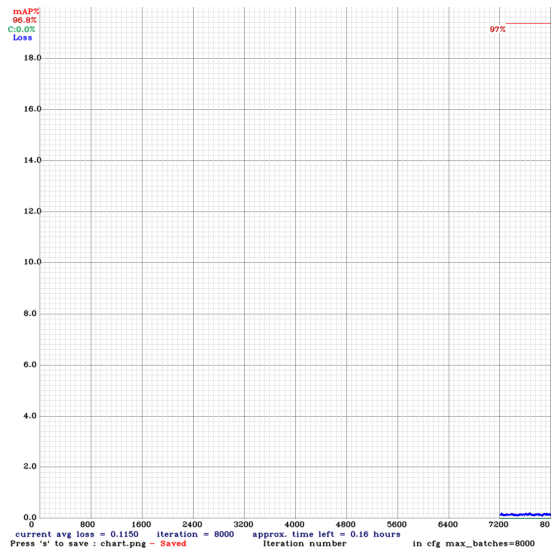

In [9]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

# Plotting training result after 2000 epochs
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
train_result = plt.imread("chart.png")
plt.axis(False)
plt.imshow(train_result)

## Test with example image/video

In [10]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

# Download example images and video
!cp /content/drive/MyDrive/examples.zip /content/darknet_for_colab
!unzip examples.zip
!rm -r examples.zip

Archive:  examples.zip
  inflating: examples/test_image_1.jpg  
  inflating: examples/test_image_2.jpg  
  inflating: examples/test_image_3.jpg  
  inflating: examples/test_image_4.jpg  
  inflating: examples/test_video.mp4  


In [11]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

# cfg/coco.data was hardcoded in darknet, thus we need 
# to duplicate one with the same content of data/yolov4.data
%cp data/yolov4.data cfg/coco.data

In [21]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

# test out our detector!
# coco.names is hardcoded somewhere in the detector
img_path = "examples/test_image_4.jpg"
!./darknet detect cfg/yolov4_custom_test.cfg backup/yolov4_custom_train_last.weights {img_path} -dont-show
# !./darknet detect cfg/yolov4_custom_test.cfg backup/yolov4_custom_train_best.weights {img_path} -dont-show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    256 x 256 x   3 ->  256 x 256 x  32 0.113 BF
   1 conv     64       3 x 3/ 2    256 x 256 x  32 ->  128 x 128 x  64 0.604 BF
   2 conv     64       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  64 0.134 BF
   3 route  1 		                           ->  128 x 128 x  64 
   4 conv     64       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  64 0.134 BF
   5 conv     32       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  32 0.067 BF
   6 conv     64       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  64 0.604 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 128 x 128 x  64 0.001 BF
   8 conv     64       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  64 0.134 BF
   9 rout

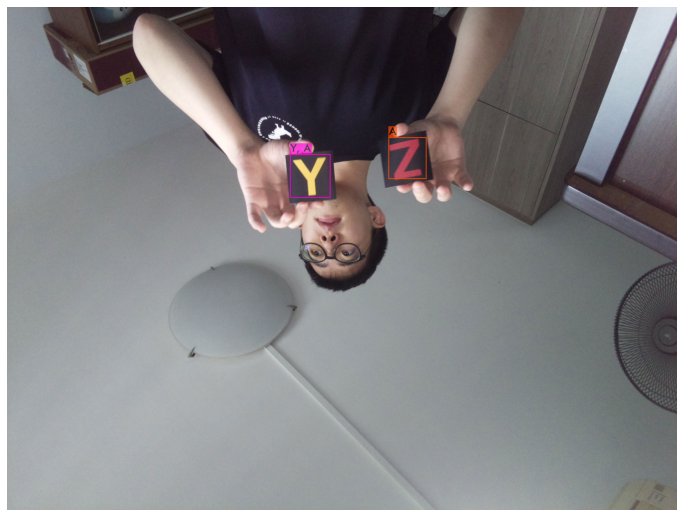

In [22]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)

In [14]:
assert os.getcwd()=='/content/darknet_for_colab', 'Directory should be "/content/darknet_for_colab" instead of "{}"'.format(os.getcwd())

# Video processed
!python darknet_video.py -v examples/test_video.mp4 -c cfg/yolov4_custom_test.cfg -w backup/yolov4_custom_train_last.weights -o output.mp4

 Try to load cfg: cfg/yolov4_custom_test.cfg, weights: backup/yolov4_custom_train_last.weights, clear = 0 
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    256 x 256 x   3 ->  256 x 256 x  32 0.113 BF
   1 conv     64       3 x 3/ 2    256 x 256 x  32 ->  128 x 128 x  64 0.604 BF
   2 conv     64       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  64 0.134 BF
   3 route  1 		                           ->  128 x 128 x  64 
   4 conv     64       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  64 0.134 BF
   5 conv     32       1 x 1/ 1    128 x 128 x  64 ->  128 x 128 x  32 0.067 BF
   6 conv     64       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  64 0.604 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 128 x 128 x  64 0.001 BF
   8 conv     64       1 x 1/ 1    128 x 128 x  64 ->  128 x 128

## The End!